### Assignment 1: Perceptron 
<b>This assignment contains four tasks</b><br>
Perceptron is the first neural network model that can learn from data, invented in 1958 at the Cornell Aeronautical Laboratory by Frank Rosenblatt. 

* Linear classifier.
* Binary or bipolar data
\begin{equation}
  \hat y=
  \begin{cases}
    1, &  \sum_{i}^{m} w_i.x_i+b> 0  \\
    -1, & \text{otherwise}
  \end{cases}
\end{equation}

Or, we can write [for a single data vector= x, weight vector=w and bias=b]
\begin{equation}
  z=x.w+b\\
  \hat y=sign(z)
\end{equation}

Or, we can simplify,
\begin{equation}
  z=X.W^T\\
  \hat y=sign(z)
\end{equation}
where X=data (NxD), W=weight vector(1xD) , b=bias(1x1)

In [199]:
import numpy as np
import matplotlib.pyplot as plt

In [200]:
X=np.array([[8, 7], [4, 10], [9, 7], [7, 10], [9, 6], [4, 8], [10, 10], [2, 7], [8, 3], [7, 5], [4, 4],  [4, 6], [1, 3], [2, 5]])
y=np.array([1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1])

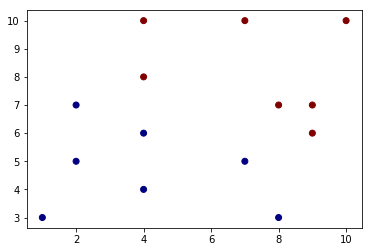

In [201]:
plt.scatter(X[:,0],X[:, 1],marker='o', c=y, cmap='jet')   
plt.show()

<b>Task_1: calculate output and plot the data</b><br>
Given, w=[-2.0, 0.4, 0.1], calculate output $\hat y$ <br> <b>note:</b> w[0]=bias<br>
 
* Output should be, $\hat y=[1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1]$
* Note: variable XX contains 1 in the first column and the rest is same as X. This will remove the necessity of useing seperate bias.

In [202]:
XX=np.c_[np.ones(X.shape[0]), X]  #add column with value 1 in the first column. to remove the need of separate bias
print(XX)

[[ 1.  8.  7.]
 [ 1.  4. 10.]
 [ 1.  9.  7.]
 [ 1.  7. 10.]
 [ 1.  9.  6.]
 [ 1.  4.  8.]
 [ 1. 10. 10.]
 [ 1.  2.  7.]
 [ 1.  8.  3.]
 [ 1.  7.  5.]
 [ 1.  4.  4.]
 [ 1.  4.  6.]
 [ 1.  1.  3.]
 [ 1.  2.  5.]]


In [203]:
#your code goes here.

def linear_regression(k,h):
    val=0
    for i,j in zip(k,h):  
        val=val+(i*j)
    return val

def activate(val):
        if val>0:
            return 1
        else:
            return -1

def predict(x,w):
    hp=[]
    for i in x:
        lr=linear_regression(i,w)
        h=activate(round(lr,5))
        hp.append(h)
    return hp

In [204]:
w=[-2.0, 0.4, 0.1]
p_value=predict(XX,w)
print(p_value)

[1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1]


## Task_1 complete ...................

<b>Plotting the hyperplane</b>

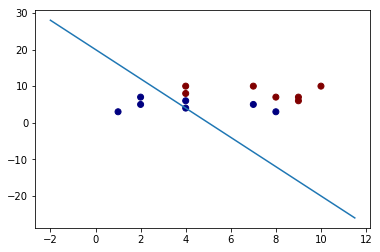

In [205]:
w=[-2.0, 0.4, 0.1]
nx=np.arange(-2,12,0.5)
#ax+by+c=0
ny=-(w[1]*nx+w[0])/w[2]

plt.scatter(X[:,0],X[:, 1],marker='o', c=y, cmap='jet')  
plt.plot(nx, ny )  
plt.show()

<b>Task_2: Update check</b>
Let's choose a missclassified data,  $rx=[1, 4,6], ry=-1$ <br>
Update rule: $w=w+ \eta(ry*rx)$  <br>
Where, learning rate $0> \eta \leq 1$ <br>
Let, $\eta=0.1$  <br>
* update w for the data. w should be [-2.1,  0. , -0.5]

In [206]:
#your code goes here.

w=[-2.0, 0.4, 0.1]

𝑟𝑥=[1,4,6]
rx=np.array(rx)
𝑟𝑦=-1
theta=0.1
w=w+(theta*(rx*ry))
print(w)

[-2.1  0.  -0.5]


## Task_2 complete ...................

<b>Task_3: Train perceptron</b> <br>

* your task is to implement perceptron learning algorithm. Your implementation should correctly classify the data above. <br>
* Print the trained W <br>
* Plot the data and the decision boundary <br>
* Average Loss $loss=\frac{1}{N} \sum(y-\hat y)^2$
* Plot loss history.

In [207]:
#your code goes here.


def linear_regression(k,h):
    val=0
    for i,j in zip(k,h):  
        val=val+(i*j)
    return val

def activate(val):
        if val>0:
            return 1
        else:
            return -1

def predict(x,w):
    hp=[]
    for i in x:
        lr=linear_regression(i,w)
        h=activate(round(lr,5))
        hp.append(h)
    return hp

def miss_class(py, y):
    miss=[]
    loss=0
    for i in range(len(y)):
        loss+=((y[i]-py[i])**2)
        if py[i]!=y[i]:
            miss.append(i)
    return miss,loss


def perceptron(x, y,theta):
    w = np.random.rand(3)
    avg_loss=[]
    p_value=predict(x,w) 
    miss,loss=miss_class(p_value,y)
    avg_loss.append(loss/len(y))
    while len(miss)>0:
        rnd=np.random.choice(miss)
        rx=x[rnd]
        ry=y[rnd]
        w=w+(theta*(rx*ry))
        p_value=predict(x,w)
        miss,loss=miss_class(p_value,y)
        #print(loss)
        avg_loss.append(loss/len(y))
    return w,avg_loss


def accuracy(y,new_y):
        count=0
        for i,j in zip(y,new_y):
                if(i==j):
                    count+=1
        if(len(y)!=0):
            #print('old_y :',y)
            count=count/len(y)
            print('accuracy= ',count*100,'%')

In [208]:
#w=[-2.0, 0.4, 0.1] 

theta=0.1
w,avg_loss=perceptron(XX,y,theta)

w=np.array(w)
#avg_loss=np.array(avg_loss)


print("The trained W: ",w)

The trained W:  [-6.20255673  0.26667678  0.73014846]


In [209]:
pp=predict(XX,w)
print(pp)
accuracy(y,pp)

[1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1]
accuracy=  100.0 %


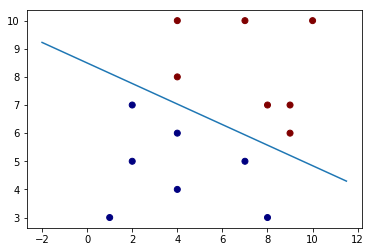

In [210]:
nx=np.arange(-2,12,0.5)
#print(nx)
#ax+by+c=0
ny=-(w[1]*nx+w[0])/w[2]

plt.scatter(X[:,0],X[:, 1],marker='o', c=y, cmap='jet')  
plt.plot(nx, ny )  
plt.show()

In [211]:
print("\navg loss value: \n\n",avg_loss)


avg loss value: 

 [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.2857142857142856, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.2857142857142856, 2.0, 2.5714285714285716, 2.0, 2.0, 2.0, 2.0, 1.7142857142857142, 2.0, 2.0, 2.0, 2.0, 2.0, 2.2857142857142856, 2.0, 2.0, 1.7142857142857142, 2.0, 2.0, 2.2857142857142856, 2.0, 2.0, 2.0, 2.0, 1.4285714285714286, 2.0, 2.0, 1.7142857142857142, 2.0, 1.7142857142857142, 2.0, 2.0, 1.1428571428571428, 2.0, 2.0, 2.2857142857142856, 2.0, 2.0, 1.7142857142857142, 2.0, 1.1428571428571428, 2.0, 2.0, 2.0, 2.0, 2.2857142857142856, 2.0, 2.0, 2.0, 2.0, 2.0, 1.7142857142857142, 2.0, 2.0, 1.7142857142857142, 1.7142857142857142, 2.0, 2.0, 1.4285714285714286, 2.0, 2.0, 1.4285714285714286, 2.0, 2.0, 1.7142857142857142, 2.0, 2.0, 1.1428571428571428, 2.0, 2.0, 1.4285714285714286, 2.0, 1.7142857142857142, 2.0, 2.0, 1.7142857142857142, 2.0, 2.0, 1.7142857142857142, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.1428571428571428, 2.0, 2.0, 1.7142857142857142, 2.0, 1.1428571428571428, 2.0, 2.0, 1.71

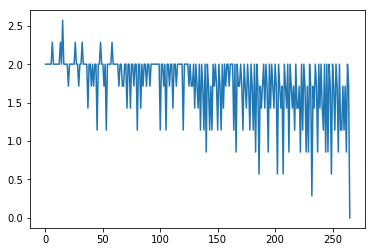

In [212]:
plt.plot(avg_loss)  
plt.show()

## Task_3 complete ...................

<b>Task_4: Train a perceptron on Iris Data</b>
* First 100 data will be used.
* Only the first two features will be used for this task.

* Your implementation should correctly classify all the data.
* Plot the prediction, decision and loss history.

In [213]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [214]:
datas=datasets.load_iris()
X=datas['data'][:100]      #first two class only.
y=datas['target'][:100]
# print(X.shape, y.shape)

X=X[:,:2]  #first two column.
X=np.array(X)
print('X:',X.shape, '  y:',y.shape)

X: (100, 2)   y: (100,)


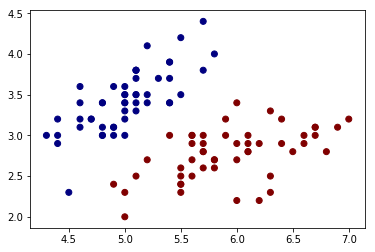

In [215]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='jet') 
plt.show()

In [216]:
XX=np.c_[np.ones(X.shape[0]), X]  #add column with value 1 in the first column. to remove the need of separate bias
print(XX[:10])

[[1.  5.1 3.5]
 [1.  4.9 3. ]
 [1.  4.7 3.2]
 [1.  4.6 3.1]
 [1.  5.  3.6]
 [1.  5.4 3.9]
 [1.  4.6 3.4]
 [1.  5.  3.4]
 [1.  4.4 2.9]
 [1.  4.9 3.1]]


In [217]:
#your code goes here.


def linear_regression(k,h):
    val=0
    for i,j in zip(k,h):  
        val=val+(i*j)
    return val

def activate(val):
        if (val>=0.5):
            return 1
        else:
            return 0

def predict(x,w):
    hp=[]
    for i in x:
        lr=linear_regression(i,w)
        h=activate(round(lr,2))
        hp.append(h)
    return hp

def miss_class(py, y):
    miss=[]
    irs_loss=0
    for i in range(len(y)): 
        irs_loss+=((y[i]-py[i])**2)
        if py[i]!=y[i]:
            miss.append(i)
    #print(irs_loss)    
    return miss,irs_loss


def perceptron(x, y,theta):
    w = np.random.rand(3)
    irs_avg_loss=[]
    p_value=predict(x,w) 
    miss,irs_loss=miss_class(p_value,y)
    irs_avg_loss.append(irs_loss/len(y))
    while len(miss)>0:
        rnd=np.random.choice(miss)
        rx=x[rnd]
        ry=y[rnd]
        #print(rx,ry)
        #w=w+(theta*(rx*ry))
        if ry==0:
            w=w-rx
        else:
            w=w+rx
        p_value=predict(x,w)
        #print(p_value)
        miss,irs_loss=miss_class(p_value,y)
        irs_avg_loss.append(irs_loss)
    return w,irs_avg_loss


def accuracy(y,new_y):
        count=0
        for i,j in zip(y,new_y):
                if(i==j):
                    count+=1
        if(len(y)!=0):
            #print('old_y :',y)
            count=count/len(y)
            print('accuracy= ',count*100,'%')

In [218]:
#w=[-2.0, 0.4, 0.1]

theta=0.1
w,irs_avg_loss=perceptron(XX,y,theta) 
w=np.array(w)
irs_avg_loss=np.array(irs_avg_loss)
print("The trained W: ",w)

The trained W:  [-97.22384555  62.007214   -78.98941288]


In [219]:
pp=predict(XX,w)
print(pp)
accuracy(y,pp)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
accuracy=  100.0 %


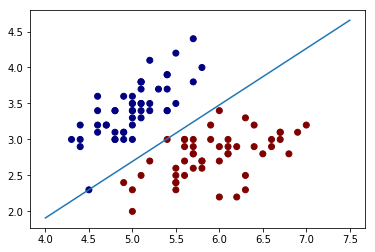

In [220]:
nx=np.arange(4,8,0.5)
#print(nx)
#ax+by+c=0
ny=-(w[1]*nx+w[0])/w[2]

plt.scatter(X[:,0],X[:, 1],marker='o', c=y, cmap='jet')  
plt.plot(nx, ny )  
plt.show()

In [223]:
print("\nAvg loss value: \n\n",irs_avg_loss)


Avg loss value: 

 [ 0.5 50.  50.  ...  1.   6.   0. ]


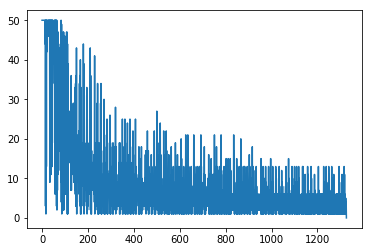

In [222]:
plt.plot(irs_all_loss)
plt.show()

## Task_4 complete ...................